In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class

In [2]:
font = {'size'   : 20, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'

In [3]:
ratio = 7./8.*(4./11)**(4./3)
hi = 6.0
low = 3.0
alpha = (1+ratio*hi)/(1+ratio*low)

In [4]:
low_neff = {'N_eff':low,'omega_cdm': 0.12029,'omega_b': 0.022068, 'output': 'tCl','YHe':0.25,'n_s':0.9624,'A_s':2.3e-9}
OmegaL = 0.7;
hlo = np.sqrt((low_neff['omega_cdm']+low_neff['omega_b'])/(1-OmegaL))
low_neff['h']=hlo

high_neff = low_neff.copy();
high_neff['N_eff']=hi;
high_neff['omega_cdm']=low_neff['omega_cdm']*alpha+(alpha-1.)*low_neff['omega_b'];
high_neff['h']=np.sqrt((high_neff['omega_cdm']+high_neff['omega_b'])/(1-OmegaL))

high_neff_ns = high_neff.copy();
high_neff_ns['n_s']=1.0
high_neff_ns['A_s']=2.17e-9


In [5]:
cosmohi = Class()
cosmohi.set(high_neff)
cosmohi.compute()
cl_hi = cosmohi.raw_cl()['tt']

In [6]:
cosmohins = Class()
cosmohins.set(high_neff_ns)
cosmohins.compute()
cl_hins = cosmohins.raw_cl()['tt']

In [7]:
cosmolo = Class()
cosmolo.set(low_neff)
cosmolo.compute()
CL_lo = cosmolo.raw_cl()
cl_lo = CL_lo['tt']
l = CL_lo['ell']

In [9]:
print(cosmolo.angular_distance(1040) / cosmolo.rs_drag())
print(cosmohi.angular_distance(1040) / cosmohi.rs_drag())

99.9153144414785
100.63425401577095


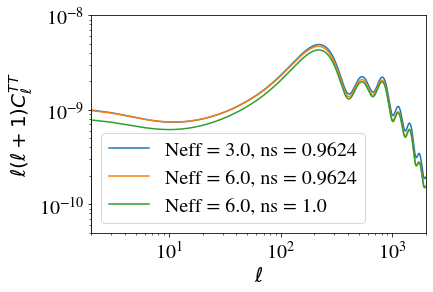

In [10]:
plt.loglog(l, l*(l+1)*cl_lo)
plt.loglog(l, l*(l+1)*cl_hi)
plt.loglog(l, l*(l+1)*cl_hins)
plt.xlabel('$\ell$')
plt.ylabel('$\ell(\ell+1) C_\ell^{TT}$')
plt.xlim([2,2000])
plt.ylim([5e-11,1e-8])
plt.legend(['Neff = {0}, ns = {1}'.format(low_neff['N_eff'],low_neff['n_s']),
        'Neff = {0}, ns = {1}'.format(high_neff['N_eff'],high_neff['n_s']),
        'Neff = {0}, ns = {1}'.format(high_neff_ns['N_eff'],high_neff_ns['n_s'])],loc=3)


/Users/au192734/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/au192734/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


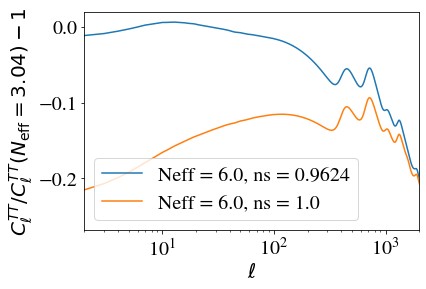

In [11]:
plt.semilogx(l, cl_hi/cl_lo-1.0)
plt.semilogx(l, cl_hins/cl_lo-1.0)
plt.xlim([2,2000])
plt.ylabel('$C_\ell^{TT}/C_\ell^{TT}(N_\mathrm{eff}=3.04) - 1$')
plt.xlabel('$\ell$')
plt.legend(['Neff = {0}, ns = {1}'.format(high_neff['N_eff'],high_neff['n_s']),
        'Neff = {0}, ns = {1}'.format(high_neff_ns['N_eff'],high_neff_ns['n_s'])],loc=3)